## edge detection and distance measurement using opencv and python

In [55]:
from os import path
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
%matplotlib inline

In [2]:
curdir = path.abspath("")

to prove this algorithm will use a simple chess board image. below is a list of step involved in this algorithm  
1. convert the image into gray scale for simplicity
2. blur the images to reduce the noise in the image
3. apply canny edge detection and convert the image into series of lines
4. apply dilate to join any disjointed adjacent edges.
5. find the corners point and store them to a list.
6. using these values we can calculate the distances in the image.

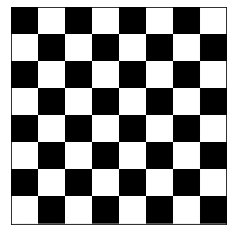

In [36]:
img_original = cv.imread(path.join(curdir,"chessboard.jpg"))
gray = cv.cvtColor(img_original,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")
plt.xticks([]),plt.yticks([])
plt.show()

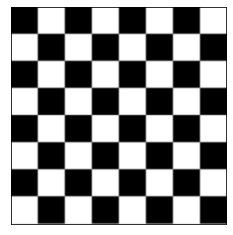

In [9]:
blured = cv.GaussianBlur(gray, (15, 15), 0)
plt.imshow(blured,cmap="gray")
plt.xticks([]),plt.yticks([])
plt.show()

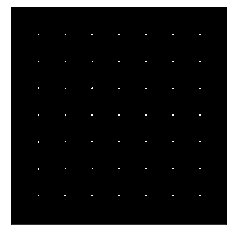

In [10]:
edged = cv.Canny(blured, 50, 100) # converting the image into
plt.imshow(edged,cmap="gray")
plt.xticks([]),plt.yticks([])
plt.show()

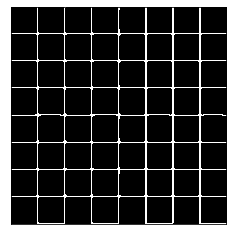

In [13]:
dilated = cv.dilate(edged, None, iterations=2)
plt.imshow(dilated,cmap="gray")
plt.xticks([]),plt.yticks([])
plt.show()

In [62]:
corners = cv.goodFeaturesToTrack(dilated,300,0.5,100)
corners = np.int16(corners)

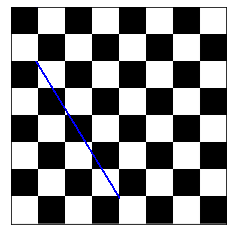

In [63]:
x1,y1 = corners[0].ravel()
x2,y2 = corners[1].ravel()

final = cv.line(img_original,tuple(corners[0].ravel()),tuple(corners[1].ravel()),(0,0,255),5)
plt.imshow(final)
plt.xticks([]),plt.yticks([])
plt.show()

In [67]:
def line_length(pnt1,pnt2):
    return sqrt(((pnt2[0]-pnt1[0])**2)+((pnt2[1]-pnt1[1])**2))

In [68]:
distance = line_length([x1,y1],[x2,y2])

In [69]:
distance

655.3205322588328

In [66]:
print(x1,y1)
print(x2,y2)

445 786
103 227
